In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import plotly.express as px
from scipy.stats import norm #statistic
from sklearn.preprocessing import StandardScaler , LabelEncoder #normalisasi dan standardisasi data
from scipy import stats #statistic
import random
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

# **OVERVIEW**

The dataset is from a survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. 

**EXPECTED OUTPUT:** predict whether a worker needs treatment or not.

# **DATA UNDERSTANDING**

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

### Exploratory Data Analysis (EDA)
1. Data Cleaning -> Numerical Feature and Categorical yang aneh nilainya
2. Plotting Numerical
3. Plotting Categorical based on target

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in df: #df diubah sesuai dengan nama dataframe
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

,Columns,Unique
0,Timestamp,1246
25,comments,160
1,Gender,49
2,Country,48
3,state,45
8,no_employees,6
16,leave,5
7,work_interfere,4
23,mental_vs_physical,3
22,phys_health_interview,3


In [7]:
#Drop Column
column=['Timestamp','comments']
df = df.drop(columns=column)

In [8]:
for column in df.columns: #df disesuaikan dengan nama dataframe
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Age =================


 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         


============= Gender =================


Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      


============= Country =================


United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  


============= state =================


CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64


============= self_employed =================


No     1095
Yes     146
Name: self_employed, dtype: int64


============= family_history =================


No     767
Yes    492
Name: family_history, dtype: int64


============= treatment =================


Yes    637
No     622
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


============= remote_work =================


No     883
Yes    376
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1031
No      228
Name: tech_company, dtype: int64


============= benefits =================


Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


============= care_options =================


No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


============= wellness_program =================


No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


============= seek_help =================


No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


============= leave =================


Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


============= mental_health_consequence =================


No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64


============= supervisor =================


Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1075
Yes     184
Name: obs_consequence, dtype: int64

Terdapat keanehan data pada kolom Age, dimana terdapat nilai minus dan nilai yang sangat besar, untuk itu kita remove dan ambil usia bekerja saja.

### Data Cleaning (Age, Gender)

In [11]:
# Age / umur orang di usia kerja (17 sampai 60)
df = (df[(df.Age >= 15) & (df.Age <= 60)])

In [12]:
# Gender
df['Gender'] = df['Gender'].str.lower()

In [13]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Age =================


29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
54     3
55     3
57     3
60     2
47     2
58     1
53     1
Name: Age, dtype: int64


============= Gender =================


male                                              814
female                                            182
m                                                 149
f                                                  53
woman                                               4
make                                                4
male                                                3
cis male                                            3
female                                              2
man                                                 2
female (trans)                                      2
msle                                                1
male leaning androgynous                            1
trans woman                                         1
queer                                               1
neuter                                              1
cis-female/femme                                    1
female (cis)                                        1
mail                        


============= Country =================


United States             743
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
Belgium                     6
Brazil                      6
Israel                      5
South Africa                5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu


============= state =================


CA    137
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
OH     27
IN     26
MI     22
MN     20
MA     20
NC     14
VA     14
FL     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64


============= self_employed =================


No     1089
Yes     140
Name: self_employed, dtype: int64


============= family_history =================


No     759
Yes    488
Name: family_history, dtype: int64


============= treatment =================


Yes    630
No     617
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    463
Never        210
Rarely       173
Often        140
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              288
26-100            288
More than 1000    280
100-500           175
1-5               157
500-1000           59
Name: no_employees, dtype: int64


============= remote_work =================


No     879
Yes    368
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1023
No      224
Name: tech_company, dtype: int64


============= benefits =================


Yes           471
Don't know    407
No            369
Name: benefits, dtype: int64


============= care_options =================


No          497
Yes         438
Not sure    312
Name: care_options, dtype: int64


============= wellness_program =================


No            835
Yes           227
Don't know    185
Name: wellness_program, dtype: int64


============= seek_help =================


No            639
Don't know    363
Yes           245
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    811
Yes           372
No             64
Name: anonymity, dtype: int64


============= leave =================


Don't know            560
Somewhat easy         264
Very easy             202
Somewhat difficult    125
Very difficult         96
Name: leave, dtype: int64


============= mental_health_consequence =================


No       487
Maybe    473
Yes      287
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       918
Maybe    271
Yes       58
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    767
No              258
Yes             222
Name: coworkers, dtype: int64


============= supervisor =================


Yes             509
No              389
Some of them    349
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1000
Maybe     206
Yes        41
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    553
No       494
Yes      200
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    573
Yes           337
No            337
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1068
Yes     179
Name: obs_consequence, dtype: int64

In [14]:
def gender_column(x):
    if x == 'male' or x=='m' or x=='man':
        return 'Male'
    elif x == 'woman' or x=='f' or x=='female':
        return 'Female'
    else :
        return 'Other'

In [15]:
df['Gender'] = df['Gender'].apply(lambda x: gender_column(x))

In [16]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Age =================


29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
54     3
55     3
57     3
60     2
47     2
58     1
53     1
Name: Age, dtype: int64


============= Gender =================


Male      965
Female    239
Other      43
Name: Gender, dtype: int64


============= Country =================


United States             743
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
Belgium                     6
Brazil                      6
Israel                      5
South Africa                5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu


============= state =================


CA    137
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
OH     27
IN     26
MI     22
MN     20
MA     20
NC     14
VA     14
FL     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64


============= self_employed =================


No     1089
Yes     140
Name: self_employed, dtype: int64


============= family_history =================


No     759
Yes    488
Name: family_history, dtype: int64


============= treatment =================


Yes    630
No     617
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    463
Never        210
Rarely       173
Often        140
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              288
26-100            288
More than 1000    280
100-500           175
1-5               157
500-1000           59
Name: no_employees, dtype: int64


============= remote_work =================


No     879
Yes    368
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1023
No      224
Name: tech_company, dtype: int64


============= benefits =================


Yes           471
Don't know    407
No            369
Name: benefits, dtype: int64


============= care_options =================


No          497
Yes         438
Not sure    312
Name: care_options, dtype: int64


============= wellness_program =================


No            835
Yes           227
Don't know    185
Name: wellness_program, dtype: int64


============= seek_help =================


No            639
Don't know    363
Yes           245
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    811
Yes           372
No             64
Name: anonymity, dtype: int64


============= leave =================


Don't know            560
Somewhat easy         264
Very easy             202
Somewhat difficult    125
Very difficult         96
Name: leave, dtype: int64


============= mental_health_consequence =================


No       487
Maybe    473
Yes      287
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       918
Maybe    271
Yes       58
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    767
No              258
Yes             222
Name: coworkers, dtype: int64


============= supervisor =================


Yes             509
No              389
Some of them    349
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1000
Maybe     206
Yes        41
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    553
No       494
Yes      200
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    573
Yes           337
No            337
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1068
Yes     179
Name: obs_consequence, dtype: int64

## Plotting for Numerical Data
1. Distribusi Age dari employee
2. Keterkaitan antara Age dengan treatment, diumur berapa orang butuh mendapatkan treatment tingkat stress?

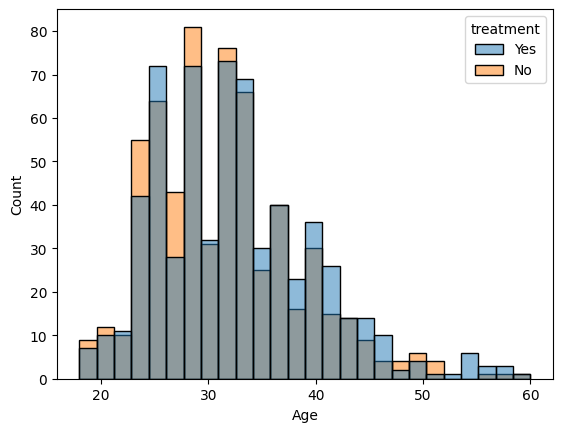

In [19]:
sns.histplot(data=df, x="Age", hue="treatment")
plt.show()

## Plotting for Categorical Data

In [79]:
#Function untuk plotting data categorical
def categorical_data(data,dataframe):
    plt.figure(figsize=(20,10))
    g=sns.catplot(x=data,kind='count', hue="treatment", palette='viridis', data=dataframe)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + 0, 
            p.get_height() * 1.01, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='45', size='large')
       ax.tick_params(axis='x', rotation=45)
    plt.show()

1. Apakah Remote Working mempengaruhi tingkat stress seseorang dan perlu di treatment ?

<Figure size 2000x1000 with 0 Axes>

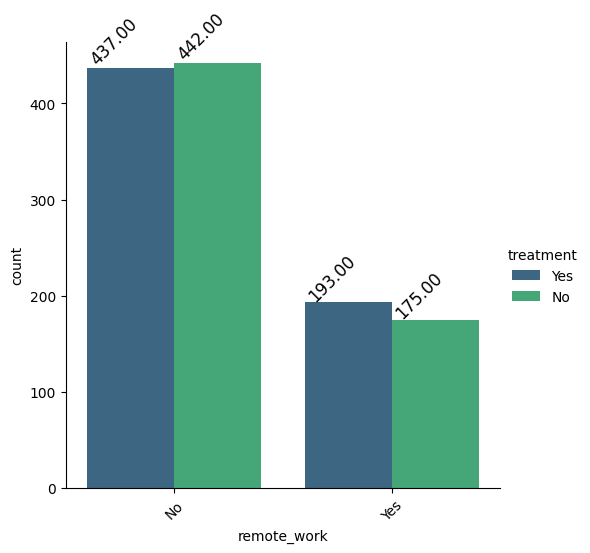

In [80]:
categorical_data('remote_work',df)

2. Gender mana yang mudah mengalami stress ?

<Figure size 2000x1000 with 0 Axes>

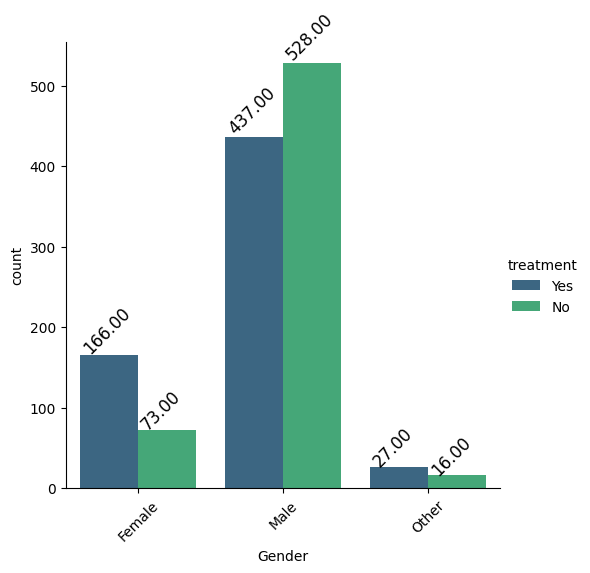

In [83]:
categorical_data('Gender',df)

3. Seberapa mudah orang mengambil jatah cuti apakah sering stress atau tidak ?

<Figure size 2000x1000 with 0 Axes>

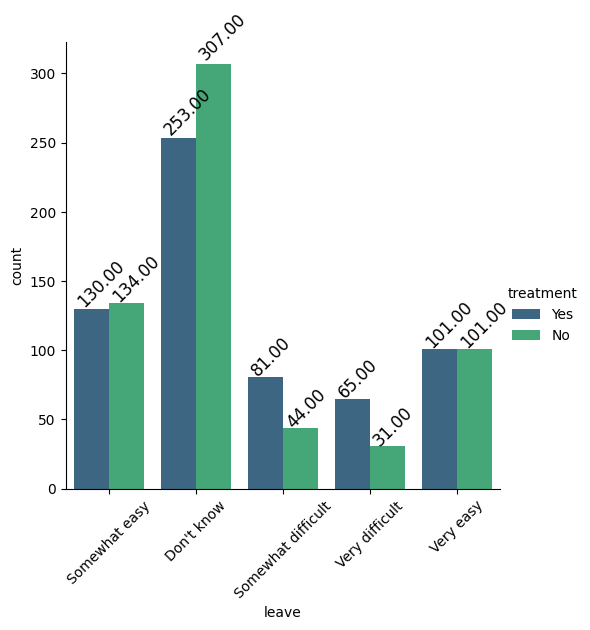

In [84]:
categorical_data('leave',df)

4. Seberapa pengaruh mental bawahan terhadap supervisor terkait dengan curhat dari bawahan ke supervisor ?

<Figure size 2000x1000 with 0 Axes>

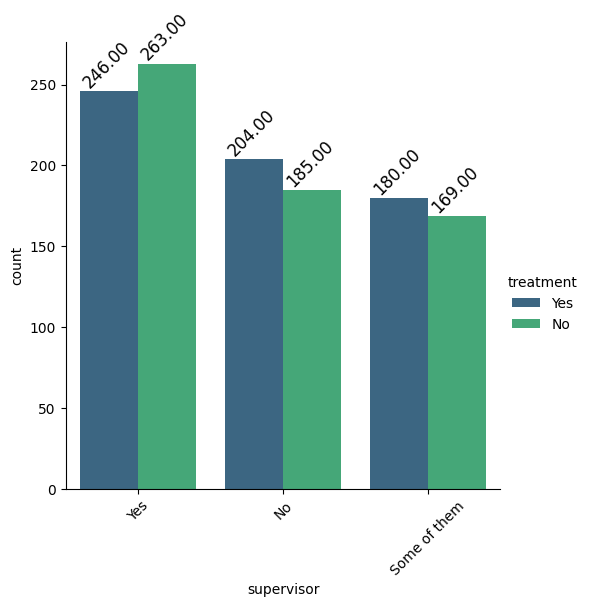

In [85]:
categorical_data('supervisor',df)

5. Seberapa toxic rekan kerjanya, sehingga mempengaruhi mental seseorang ?

<Figure size 2000x1000 with 0 Axes>

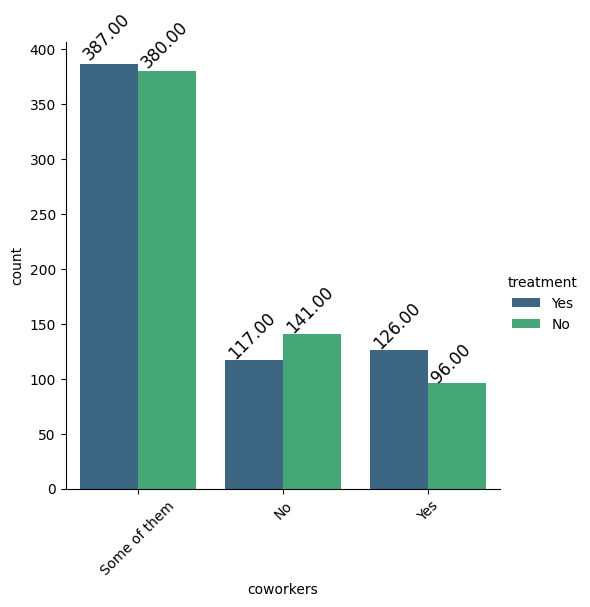

In [86]:
categorical_data('coworkers',df)

6. Adakah pengaruh tingkat stress karyawan terhadap keluarga yang memiliki masalah mental ?

<Figure size 2000x1000 with 0 Axes>

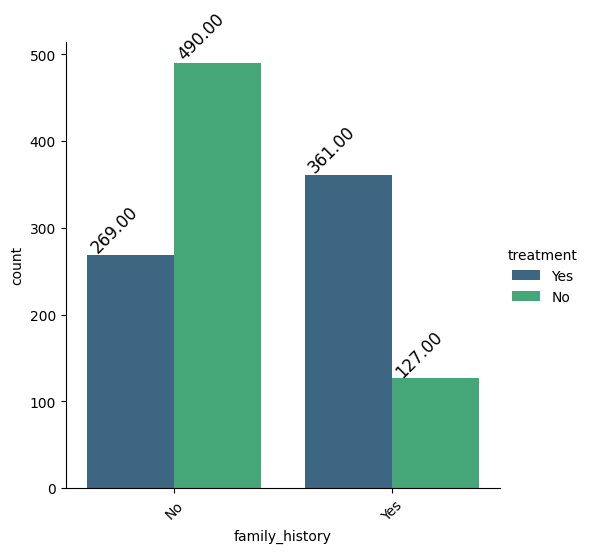

In [87]:
categorical_data('family_history',df)

7. Adakah pengaruh benefits terhadap tingkat stress karyawan ?

<Figure size 2000x1000 with 0 Axes>

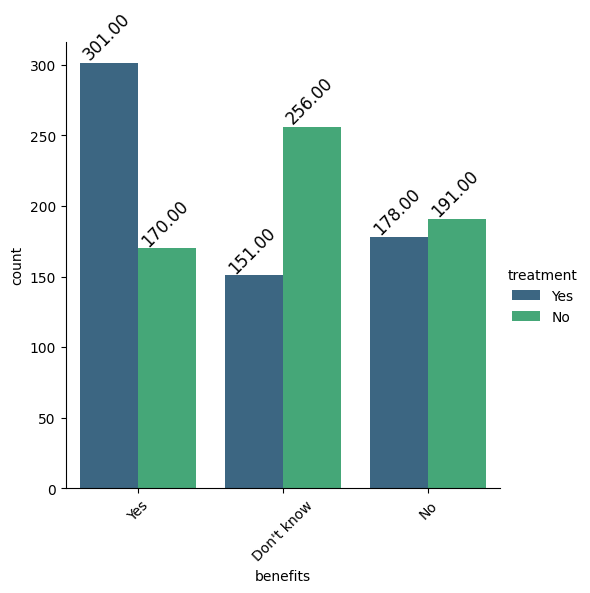

In [88]:
categorical_data('benefits',df)

8. Berapa banyak karyawan yang menjaga privasinya ketika mengambil treatment ?

<Figure size 2000x1000 with 0 Axes>

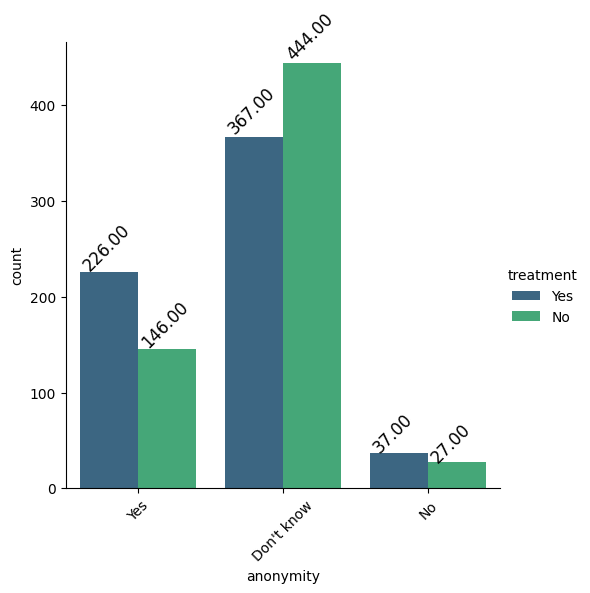

In [89]:
categorical_data('anonymity',df)

9. Apakah tingkat stress orang-orang berkurang tatkala meminta pertolongan terhadap rekan kerjanya ?

<Figure size 2000x1000 with 0 Axes>

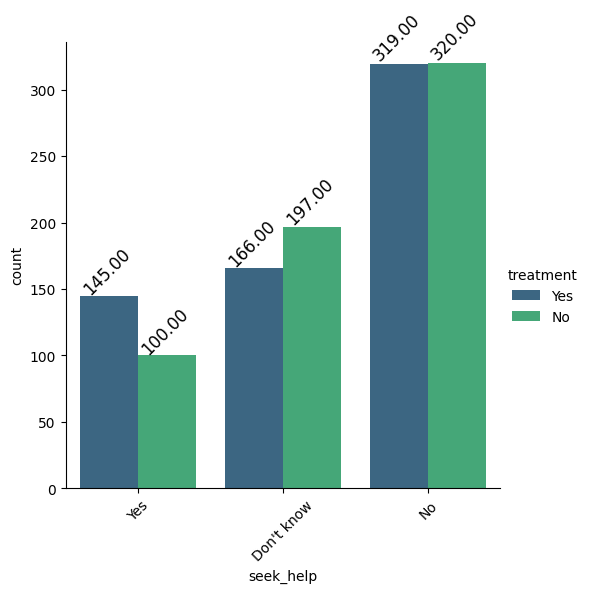

In [90]:
categorical_data('seek_help',df)

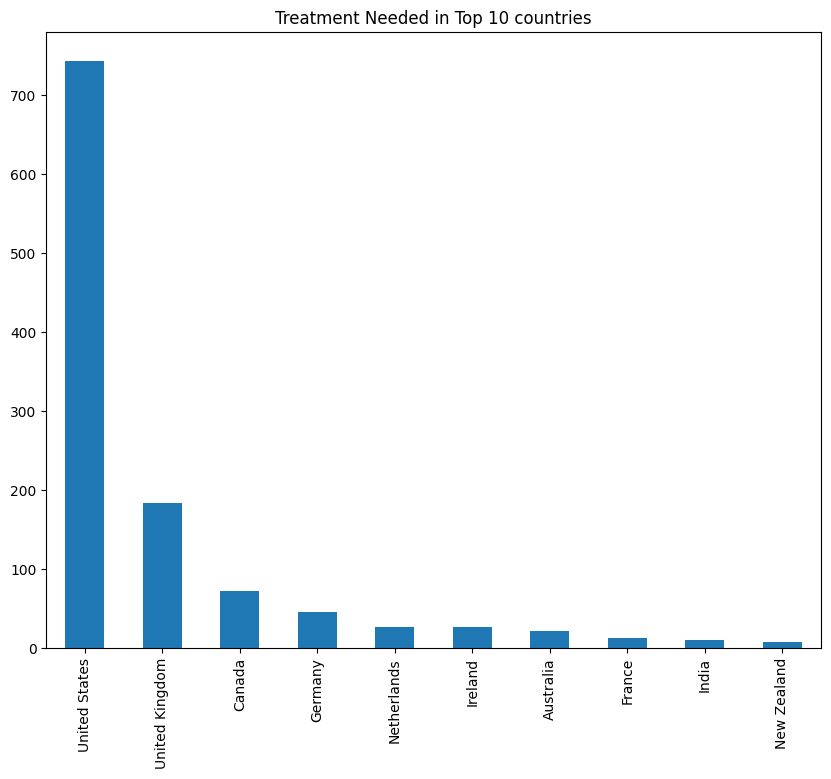

In [94]:
top_10 = df['Country'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Treatment Needed in Top 10 countries')
plt.show()

# Feature Engineering
1. Drop Duplikat
2. Missing Value Handling
3. Outlier Handling
4. Standardisasi menggunakan standar scaller
5. Encoding Categorical

### Drop Duplicated Data

In [95]:
print("Before drop duplicated data")
df.shape

Before drop duplicated data


(1247, 25)

In [96]:
#drop duplikat
df = df.drop_duplicates(keep='first')

In [97]:
print("After drop duplicated data")
df.shape

After drop duplicated data


(1243, 25)

# MISSING VALUES

*CHECKING MISSING VALUES*





In [98]:
df.isna().sum()

Age                            0
Gender                         0
Country                        0
state                        508
self_employed                 18
family_history                 0
treatment                      0
work_interfere               260
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

## Handling missing values(drop, mode)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1243 non-null   int64 
 1   Gender                     1243 non-null   object
 2   Country                    1243 non-null   object
 3   state                      735 non-null    object
 4   self_employed              1225 non-null   object
 5   family_history             1243 non-null   object
 6   treatment                  1243 non-null   object
 7   work_interfere             983 non-null    object
 8   no_employees               1243 non-null   object
 9   remote_work                1243 non-null   object
 10  tech_company               1243 non-null   object
 11  benefits                   1243 non-null   object
 12  care_options               1243 non-null   object
 13  wellness_program           1243 non-null   object
 14  seek_hel

In [100]:
#split data -> prevent data leakage
train , test = train_test_split(df,test_size=0.2, random_state=42)

In [187]:
train.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1083,34,Female,Canada,No,Yes,Yes,Often,26-100,No,No,Don't know,No,Yes,Don't know,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Yes,No
96,24,Male,United States,No,Yes,No,Rarely,26-100,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No
1198,32,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,Yes,Not sure,No,Don't know,Don't know,Very difficult,Yes,Maybe,Some of them,No,No,No,Don't know,No
890,42,Male,United States,Yes,Yes,No,Sometimes,6-25,Yes,No,Yes,Not sure,Don't know,Yes,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No
179,33,Male,United States,No,No,No,No,6-25,Yes,Yes,Don't know,No,No,No,Don't know,Very easy,No,No,Yes,Yes,No,Maybe,Don't know,No


In [188]:
test.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
909,48,Male,United States,No,No,Yes,Never,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,Maybe,Maybe,Yes,Yes,No,Maybe,Yes,Yes
1014,31,Male,United States,No,No,No,Sometimes,More than 1000,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know,Yes,Maybe,Some of them,Some of them,No,Maybe,Yes,No
676,22,Male,India,No,No,No,No,26-100,No,Yes,No,No,No,No,Don't know,Don't know,Maybe,Maybe,Some of them,Yes,Maybe,Maybe,Don't know,No
625,28,Female,United States,No,Yes,Yes,Rarely,500-1000,No,Yes,Yes,Yes,Yes,Yes,Don't know,Somewhat difficult,Maybe,No,No,Some of them,No,No,No,No
935,38,Male,United Kingdom,Yes,Yes,Yes,Rarely,1-5,Yes,No,No,No,No,No,Yes,Very difficult,Maybe,No,No,No,No,No,No,No


there are state, self_employed,work_interfere have missing value. Let's split it then do with mode handling missing value

In [101]:
# df['state'] = df['state'].fillna('NaN')
# df['self_employed'] = df['self_employed'].fillna('NaN')
# df['work_interfere'] = df['work_interfere'].fillna('NaN')

In [102]:
df.isna().sum()

Age                            0
Gender                         0
Country                        0
state                        508
self_employed                 18
family_history                 0
treatment                      0
work_interfere               260
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### Handling Missing Value in data train

In [103]:
100 * len(train[train['state'].isna()]) / len(train)

41.54929577464789

In [104]:
100 * len(train[train['work_interfere'].isna()]) / len(train)

21.428571428571427

In [105]:
100 * len(train[train['self_employed'].isna()]) / len(train)

1.710261569416499

Because of > 30% data in state has missing value, so we drop both in data train and test that contains state columns. Both dataset must have same columns

In [106]:
train = train.drop(columns=['state'])
test = test.drop(columns=['state'])

In [107]:
# Mode imputation on self_employed column

mode_self_employed = train[~train['self_employed'].isna()]['self_employed'].mode()[0]
train['self_employed'] = train['self_employed'].fillna(mode_self_employed)

In [108]:
mode_self_employed

'No'

In [109]:
# Mode imputation on work_interfere column

mode_work_interfere = train[~train['work_interfere'].isna()]['self_employed'].mode()[0]
train['work_interfere'] = train['work_interfere'].fillna(mode_work_interfere)

### Handling Missing Value in data test

In [110]:
# Mode imputation on self_employed column
test['self_employed'] = test['self_employed'].fillna(mode_self_employed)

In [111]:
# Mode imputation on self_employed column
test['work_interfere'] = test['work_interfere'].fillna(mode_work_interfere)

In [112]:
train.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [114]:
test.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [115]:
#concat train and test -> menggabungkan kembali data train dan data test menjadi data frame yang utuh
df = pd.concat([train,test],axis=0) 
# axis = 1 itu artinya menggabungkan 2 dataframe atau lebih dengan kolom berbeda
# axis = 0 itu artinya menggabungkan 2 dataframe atau lebih dengan kolom yang sama (jadi ditumpuk)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


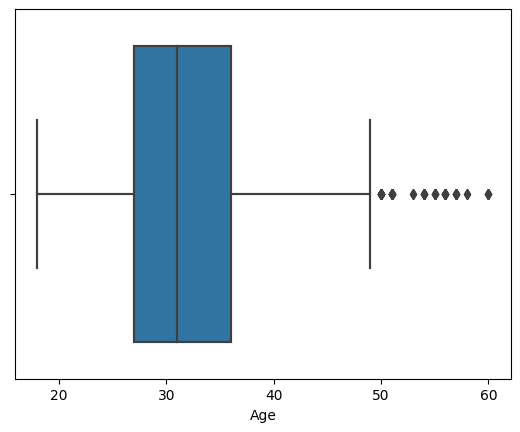

In [117]:
# Check outliers using boxplot
sns.boxplot(df['Age'])
plt.show()

Because of <10.000 baris data, so we must not remove outliers in statistics. Data diatas terdapat outlier tapi masih masuk kedalam rentang usia kerja jadi tidak perlu kita remove outlier.

## Standardized

In [118]:
# Standardize Age using StandardScaler -> semua kolom numerik harus di standardisasi pakai standarscaller
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [119]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1083,0.286775,Female,Canada,No,Yes,Yes,Often,26-100,No,No,Don't know,No,Yes,Don't know,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Yes,No
96,-1.130002,Male,United States,No,Yes,No,Rarely,26-100,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No
1198,0.003419,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,Yes,Not sure,No,Don't know,Don't know,Very difficult,Yes,Maybe,Some of them,No,No,No,Don't know,No
890,1.420197,Male,United States,Yes,Yes,No,Sometimes,6-25,Yes,No,Yes,Not sure,Don't know,Yes,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No
179,0.145097,Male,United States,No,No,No,No,6-25,Yes,Yes,Don't know,No,No,No,Don't know,Very easy,No,No,Yes,Yes,No,Maybe,Don't know,No


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 1083 to 580
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1243 non-null   float64
 1   Gender                     1243 non-null   object 
 2   Country                    1243 non-null   object 
 3   self_employed              1243 non-null   object 
 4   family_history             1243 non-null   object 
 5   treatment                  1243 non-null   object 
 6   work_interfere             1243 non-null   object 
 7   no_employees               1243 non-null   object 
 8   remote_work                1243 non-null   object 
 9   tech_company               1243 non-null   object 
 10  benefits                   1243 non-null   object 
 11  care_options               1243 non-null   object 
 12  wellness_program           1243 non-null   object 
 13  seek_help                  1243 non-null   obj

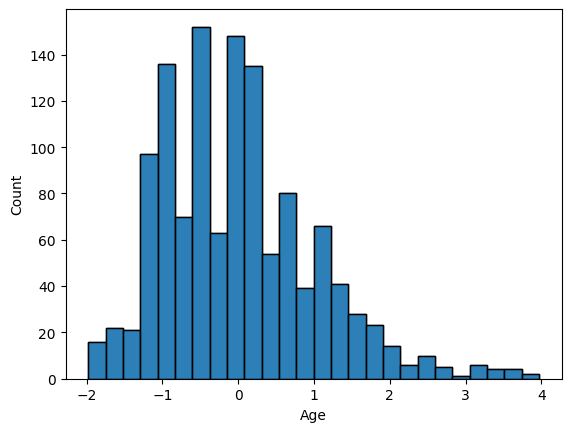

In [122]:
sns.histplot(df['Age'])
plt.show()

## Balanced Data

In [124]:
df['treatment'].value_counts()

Yes    628
No     615
Name: treatment, dtype: int64

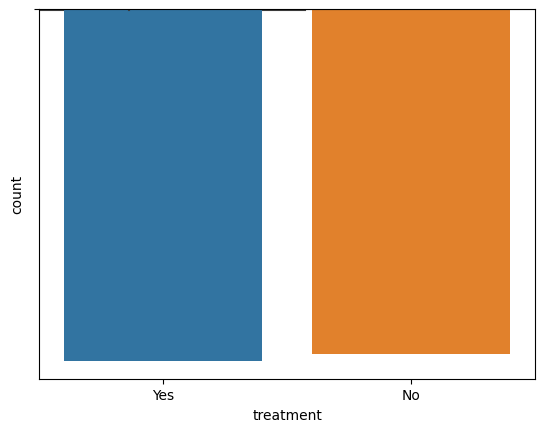

In [126]:
sns.countplot(x="treatment",data=df);#x ganti dengan nama2 kolom
plt.show()

### Encoding Categorical Data

In [127]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Age =================


-0.421614    85
 0.003419    81
-0.846647    75
 0.145097    70
-0.704969    70
-0.563292    67
-0.138258    67
 0.286775    65
-0.279936    63
-0.988325    61
 0.428453    54
-1.271680    51
-1.130002    46
 0.711808    43
 0.853486    39
 0.570130    37
 1.136841    33
 0.995164    33
 1.561874    28
 1.278519    21
-1.413358    21
 1.420197    20
-1.555036    16
 1.845230    12
 1.986908    12
 1.703552    11
-1.838391     9
-1.980069     7
 2.553619     6
-1.696713     6
 2.270263     6
 2.695296     5
 2.411941     4
 3.403685     4
 3.262007     3
 3.120329     3
 3.545363     3
 2.128585     2
 3.970396     2
 3.687040     1
 2.978652     1
Name: Age, dtype: int64


============= Gender =================


Male      961
Female    239
Other      43
Name: Gender, dtype: int64


============= Country =================


United States             743
United Kingdom            183
Canada                     72
Germany                    45
Ireland                    27
Netherlands                26
Australia                  21
France                     13
India                      10
Italy                       7
Switzerland                 7
New Zealand                 7
Sweden                      7
Poland                      7
Brazil                      6
Belgium                     6
South Africa                5
Israel                      5
Bulgaria                    4
Singapore                   4
Mexico                      3
Austria                     3
Finland                     3
Russia                      3
Colombia                    2
Greece                      2
Portugal                    2
Croatia                     2
Japan                       1
Spain                       1
China                       1
Slovenia                    1
Thailand                    1
Romania   


============= self_employed =================


No     1104
Yes     139
Name: self_employed, dtype: int64


============= family_history =================


No     757
Yes    486
Name: family_history, dtype: int64


============= treatment =================


Yes    628
No     615
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    463
No           260
Never        210
Rarely       171
Often        139
Name: work_interfere, dtype: int64


============= no_employees =================


26-100            287
6-25              286
More than 1000    280
100-500           175
1-5               156
500-1000           59
Name: no_employees, dtype: int64


============= remote_work =================


No     875
Yes    368
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1020
No      223
Name: tech_company, dtype: int64


============= benefits =================


Yes           471
Don't know    407
No            365
Name: benefits, dtype: int64


============= care_options =================


No          496
Yes         436
Not sure    311
Name: care_options, dtype: int64


============= wellness_program =================


No            832
Yes           226
Don't know    185
Name: wellness_program, dtype: int64


============= seek_help =================


No            636
Don't know    363
Yes           244
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    809
Yes           372
No             62
Name: anonymity, dtype: int64


============= leave =================


Don't know            559
Somewhat easy         262
Very easy             202
Somewhat difficult    124
Very difficult         96
Name: leave, dtype: int64


============= mental_health_consequence =================


No       486
Maybe    472
Yes      285
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       916
Maybe    269
Yes       58
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    764
No              257
Yes             222
Name: coworkers, dtype: int64


============= supervisor =================


Yes             509
No              387
Some of them    347
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       997
Maybe    205
Yes       41
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    552
No       492
Yes      199
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    572
Yes           336
No            335
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1065
Yes     178
Name: obs_consequence, dtype: int64

1. One Hot Encoding (OHE) : Gender, benefits, wellness_program, care_options, seek_help, anonymity, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, work_interfere, leave, 
2. Frequency Encoding : Country, no_employees
3. Dictionary Encoding : self_employed, treatment,remote_work,tech_company, obs_consequence, family_history 

In [128]:
#OHE
col_ohe = ['Gender', 'benefits', 'wellness_program', 'care_options', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical','work_interfere', 'leave']
#import pandas as pd for get dummies (OHE)
df = pd.get_dummies(df, columns = col_ohe)

In [129]:
#Dictionary Encoding 
def dct_encoding(df):
    df = df.copy()
    
  #encoding educational requirement
    mapping_dictionary = {
        
                "self_employed" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "treatment" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "remote_work" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "tech_company" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "obs_consequence" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "family_history" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    }        
                          }
    
    df.replace(mapping_dictionary , inplace=True)
    
    return df

In [130]:
#Dictionary Encoding
df = dct_encoding(df)

#### Frequency Encoding

In [131]:
### Country
freq_c = df['Country'].value_counts().reset_index()
freq_c

,index,Country
0,United States,743
1,United Kingdom,183
2,Canada,72
3,Germany,45
4,Ireland,27
5,Netherlands,26
6,Australia,21
7,France,13
8,India,10
9,Italy,7


In [132]:
freq_c.rename(columns={"index": "Country", "Country": "freq_c"}, inplace = True)
freq_c

,Country,freq_c
0,United States,743
1,United Kingdom,183
2,Canada,72
3,Germany,45
4,Ireland,27
5,Netherlands,26
6,Australia,21
7,France,13
8,India,10
9,Italy,7


In [133]:
freq_c['percent_country'] = round((freq_c['freq_c']/freq_c['freq_c'].sum())*100,2)
freq_c

,Country,freq_c,percent_country
0,United States,743,59.77
1,United Kingdom,183,14.72
2,Canada,72,5.79
3,Germany,45,3.62
4,Ireland,27,2.17
5,Netherlands,26,2.09
6,Australia,21,1.69
7,France,13,1.05
8,India,10,0.80
9,Italy,7,0.56


In [134]:
df = df.merge(freq_c[['Country','percent_country']], on='Country', how='inner')

In [135]:
df[['Country','percent_country']]

,Country,percent_country
0,Canada,5.79
1,Canada,5.79
2,Canada,5.79
3,Canada,5.79
4,Canada,5.79
5,Canada,5.79
6,Canada,5.79
7,Canada,5.79
8,Canada,5.79
9,Canada,5.79


In [136]:
### no_employees
freq_et = df['no_employees'].value_counts().reset_index()
freq_et.rename(columns={"index": "no_employees", "no_employees": "freq_emply"}, inplace = True)
freq_et['percent_emply'] = round((freq_et['freq_emply']/freq_et['freq_emply'].sum())*100,2)
freq_et

,no_employees,freq_emply,percent_emply
0,26-100,287,23.09
1,6-25,286,23.01
2,More than 1000,280,22.53
3,100-500,175,14.08
4,1-5,156,12.55
5,500-1000,59,4.75


In [137]:
df = df.merge(freq_et[['no_employees','percent_emply']], on='no_employees', how='inner')
df[['no_employees','percent_emply']]

,no_employees,percent_emply
0,26-100,23.09
1,26-100,23.09
2,26-100,23.09
3,26-100,23.09
4,26-100,23.09
5,26-100,23.09
6,26-100,23.09
7,26-100,23.09
8,26-100,23.09
9,26-100,23.09


In [138]:
#drop
df = df.drop(['Country', 'no_employees'], axis=1)

In [139]:
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_Female,Gender_Male,Gender_Other,benefits_Don't know,benefits_No,benefits_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,care_options_No,care_options_Not sure,care_options_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,work_interfere_Never,work_interfere_No,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,percent_country,percent_emply
0,0.286775,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,5.79,23.09
1,-1.130002,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,5.79,23.09
2,-0.846647,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,5.79,23.09
3,-0.421614,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,5.79,23.09
4,-1.838391,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,5.79,23.09


In [141]:
# Assign 'TARGET' column to y for treatment
y = df['treatment']
# Assign all columns except 'TARGET' to X except treatment
X = df.drop(['treatment'], axis = 1)

In [142]:
X.shape, y.shape

((1243, 57), (1243,))

In [143]:
#Split data into Train and Test rasionya train:test = 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (994, 57)
y_train dataset:  (994,)
X_test dataset:  (249, 57)
y_test dataset:  (249,)


In [144]:
x_test.head()

,Age,self_employed,family_history,remote_work,tech_company,obs_consequence,Gender_Female,Gender_Male,Gender_Other,benefits_Don't know,benefits_No,benefits_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,care_options_No,care_options_Not sure,care_options_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,work_interfere_Never,work_interfere_No,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,percent_country,percent_emply
900,2.411941,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.08,12.55
1003,-1.555036,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,59.77,22.53
671,0.711808,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,59.77,14.08
620,-0.138258,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,59.77,14.08
926,-0.846647,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,59.77,22.53


In [145]:
x_train.head()

,Age,self_employed,family_history,remote_work,tech_company,obs_consequence,Gender_Female,Gender_Male,Gender_Other,benefits_Don't know,benefits_No,benefits_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,care_options_No,care_options_Not sure,care_options_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,work_interfere_Never,work_interfere_No,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,percent_country,percent_emply
1072,1.561874,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,59.77,22.53
96,-0.421614,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,59.77,23.09
1183,-0.563292,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0.48,22.53
881,-0.279936,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,2.17,12.55
178,-0.988325,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,59.77,23.09


## Machine Learning Modelling (Classification Model)
Karena data kita balance maka kita lihat confusion matrix nya pada akurasi dan F1-Score

# 1. KNN

In [146]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train) #robot lagi latihan mahamin data / lagi belajar
predicted_y = knn.predict(x_test) #robotnya lagi UTS / UAS
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.6867469879518072


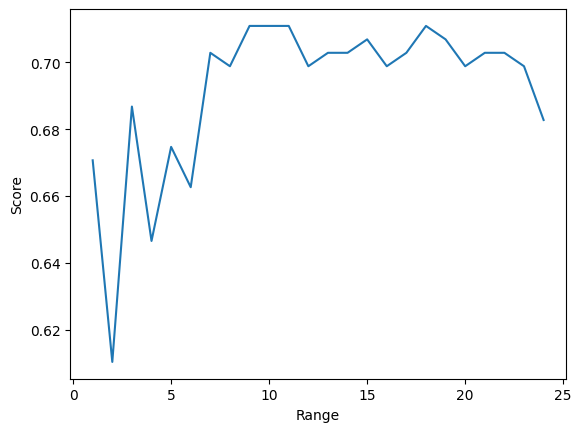

In [147]:
score_array = []
for each in range(1,25): # bisa diubah 25 atau 100 atau bebas
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [152]:
knn_model = KNeighborsClassifier(n_neighbors = 10) #setting K neighbor as best above
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to best score above is :",accuracy_knn)

KNN accuracy according to best score above is : 0.7108433734939759


# 2. Logistic Regression

In [149]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
#predicted_y = lr_model.predict(x_test) #contoh cara coding prediksi
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8514056224899599


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3. Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7911646586345381


# 4. Random Forest

In [151]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.7670682730923695


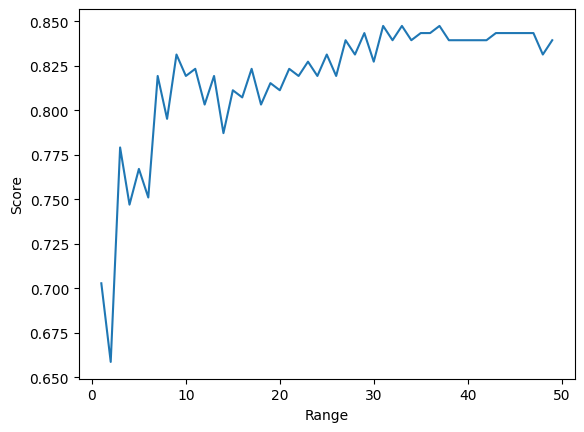

In [153]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [165]:
rf_model = RandomForestClassifier(n_estimators = 35 , random_state = 1) #set tree number as 35
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for best above is :",accuracy_rf)

Random Forest accuracy for best above is : 0.8433734939759037


# 5. Naive Bayes

In [166]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.8192771084337349


# Model Evaluation

In [167]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO-TREATMENT', 'NEED TREATMENT'],va='center')
    plt.xticks([0.5,1.5], [ 'NO-TREATMENT', 'NEED TREATMENT'],va='center')
    plt.show()

In [168]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [169]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.8514056224899599
precision:  0.8413793103448276
recall:  0.8970588235294118
f1_score:  0.8507037975277136
=========Naive Bayes=========;
accuracy:  0.8192771084337349
precision:  0.8321167883211679
recall:  0.8382352941176471
f1_score:  0.8192064963149299
=========Decision Tree=========;
accuracy:  0.7911646586345381
precision:  0.828125
recall:  0.7794117647058824
f1_score:  0.7915703216908037
=========Random Forest=========;
accuracy:  0.8433734939759037
precision:  0.8391608391608392
recall:  0.8823529411764706
f1_score:  0.8428351792794982
=========KNN=========;
accuracy:  0.6867469879518072
precision:  0.7589285714285714
recall:  0.625
f1_score:  0.686625728721337


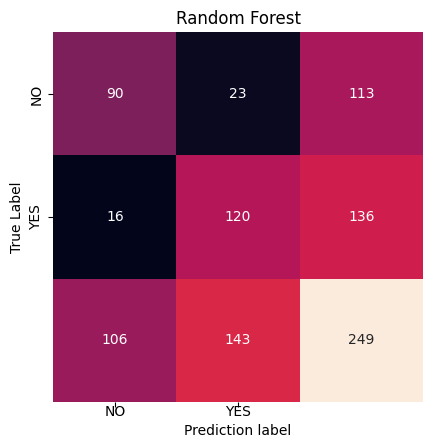

In [170]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

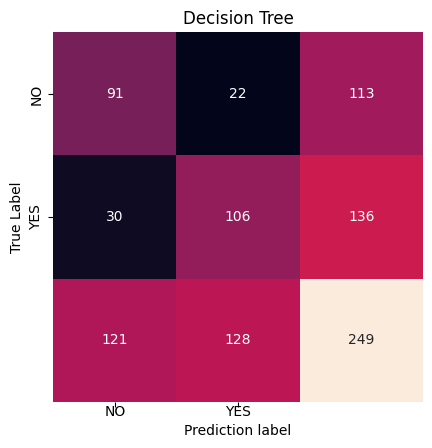

In [171]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

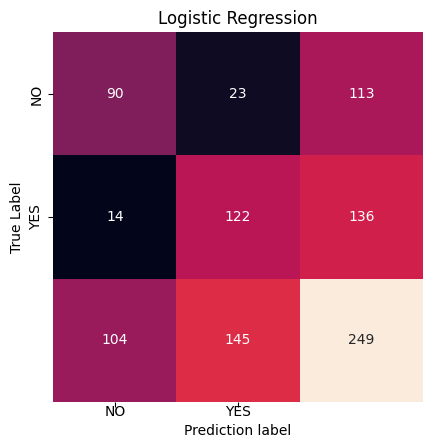

In [172]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

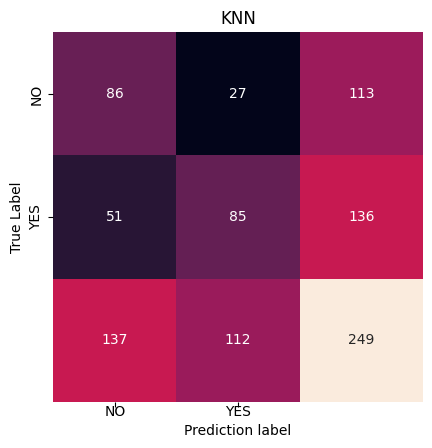

In [174]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

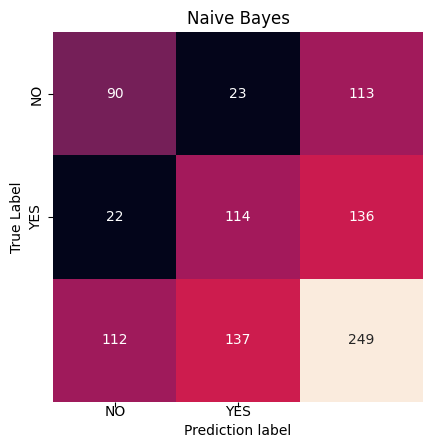

In [175]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

# Best Model for Prediction
1. Logistic Regression
2. Random Forest



## Using Random Forest

In [176]:
# let's create a dictionary of features importance values
feat_dict= {}
for col, val in sorted(zip(list(x_train), rf_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [177]:
feat_rf = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_rf

,Feature,Importance
0,work_interfere_No,0.154837
1,work_interfere_Never,0.072022
2,Age,0.060643
3,family_history,0.057101
4,work_interfere_Sometimes,0.054091
5,percent_country,0.040299
6,care_options_Yes,0.032054
7,percent_emply,0.030621
8,work_interfere_Often,0.029201
9,work_interfere_Rarely,0.020791


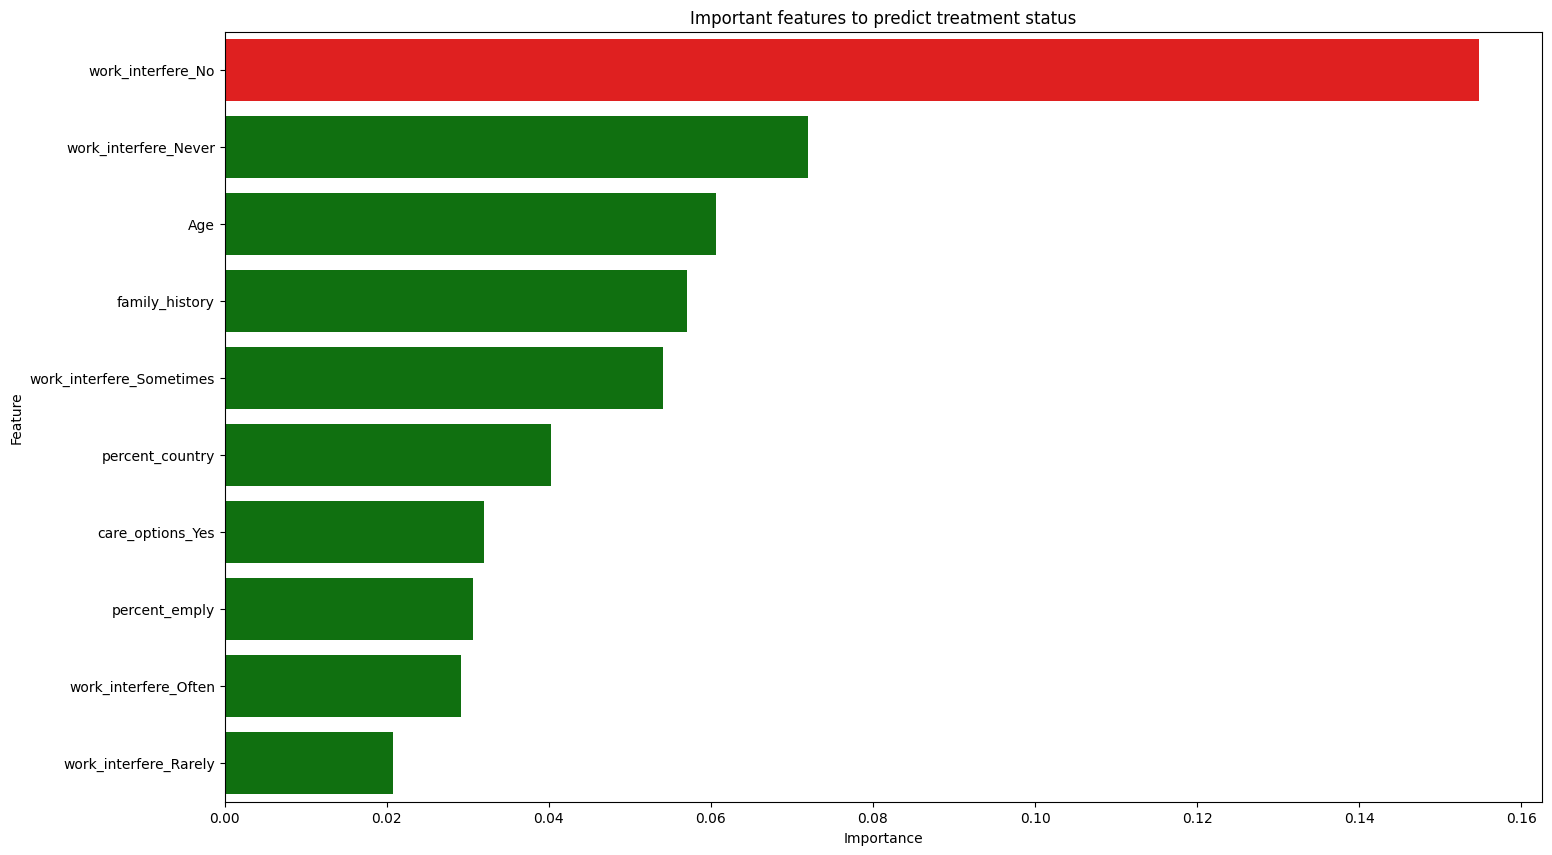

In [190]:
values = feat_rf.head(10).Importance    
idx = feat_rf.head(10).Feature
plt.figure(figsize=(17,10))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict treatment status')
plt.show()

### Predict Employees that need treatment or not ?

In [181]:
rf_model.predict(x_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [185]:
predict_random_forest = pd.DataFrame(rf_model.predict(x_test), columns=['hasil_prediksi_treatment_needed']) 
predict_random_forest

,hasil_prediksi_treatment_needed
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,1
8,1
9,1


In [189]:
df_result_pred_rf = pd.concat([test.reset_index(drop='True'),predict_random_forest.reset_index(drop='True')],axis=1)
df_result_pred_rf
# axis = 1 itu artinya menggabungkan 2 dataframe atau lebih dengan kolom berbeda
# axis = 0 itu artinya menggabungkan 2 dataframe atau lebih dengan kolom yang sama (jadi ditumpuk)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,hasil_prediksi_treatment_needed
0,48,Male,United States,No,No,Yes,Never,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,Maybe,Maybe,Yes,Yes,No,Maybe,Yes,Yes,1
1,31,Male,United States,No,No,No,Sometimes,More than 1000,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know,Yes,Maybe,Some of them,Some of them,No,Maybe,Yes,No,0
2,22,Male,India,No,No,No,No,26-100,No,Yes,No,No,No,No,Don't know,Don't know,Maybe,Maybe,Some of them,Yes,Maybe,Maybe,Don't know,No,1
3,28,Female,United States,No,Yes,Yes,Rarely,500-1000,No,Yes,Yes,Yes,Yes,Yes,Don't know,Somewhat difficult,Maybe,No,No,Some of them,No,No,No,No,1
4,38,Male,United Kingdom,Yes,Yes,Yes,Rarely,1-5,Yes,No,No,No,No,No,Yes,Very difficult,Maybe,No,No,No,No,No,No,No,0
5,39,Male,United States,No,Yes,Yes,Sometimes,6-25,Yes,Yes,No,Yes,No,No,Yes,Somewhat easy,No,No,Some of them,Yes,Maybe,Yes,Yes,No,0
6,37,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,0
7,43,Male,United States,No,No,Yes,Rarely,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Don't know,Somewhat easy,No,No,Yes,Yes,Maybe,Yes,Yes,No,1
8,27,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,Yes,No,No,No,No,Yes,Don't know,No,1
9,41,Male,United States,No,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,Maybe,No,Some of them,Yes,Maybe,Yes,Yes,Yes,1
